In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Etapa 1: Carregar os dados

# Precisão de 2 casas decimais:
pd.set_option('float_format', '{:.2f}'.format)

data = pd.read_csv('./data_new_graphics/dataset_pca.csv', sep=",")
data
# Visualizar as primeiras linhas para entender os dados
#print(data.head())

,Treatments,Canopy Height Soybean,Chlorophyll Soybean,Yield Soybean,Canopy Height Sorghum,Chlorophyll Sorghum,Yield Sorghum,Soil (P),Soil (K),Soil (Ca),...,Soil (Na),Soil (Mg),Effluent (N),Effluent (P),Effluent (K),Effluent (Ca),Effluent (S),Effluent (Na),Effluent (Mg),Effluent (Al)
0,0,72.93,43.78,7.10,109.30,50.62,36.60,17.50,1.63,30.80,...,0.01,13.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,25,83.63,43.21,8.30,106.80,50.23,36.00,24.00,1.53,30.50,...,0.04,14.30,61.20,5.90,14.20,17.70,2.40,32.00,1.80,0.20
2,50,77.75,43.59,9.70,104.10,50.70,32.50,22.00,1.53,33.80,...,0.08,15.00,122.10,11.80,28.30,35.20,4.70,63.90,3.70,0.40
3,75,77.75,44.96,7.30,107.00,50.39,34.20,17.50,2.15,33.50,...,0.08,13.30,182.50,17.70,42.30,52.60,7.00,95.40,5.50,0.60
4,100,80.37,44.79,7.50,108.20,50.80,32.60,19.00,2.23,27.00,...,0.10,11.50,243.30,23.60,56.40,70.20,9.30,127.20,7.30,0.80


In [3]:
# Selecionar apenas colunas numéricas para a análise PCA
numeric_data = data.select_dtypes(include=[np.number])
numeric_data

,Treatments,Canopy Height Soybean,Chlorophyll Soybean,Yield Soybean,Canopy Height Sorghum,Chlorophyll Sorghum,Yield Sorghum,Soil (P),Soil (K),Soil (Ca),...,Soil (Na),Soil (Mg),Effluent (N),Effluent (P),Effluent (K),Effluent (Ca),Effluent (S),Effluent (Na),Effluent (Mg),Effluent (Al)
0,0,72.93,43.78,7.10,109.30,50.62,36.60,17.50,1.63,30.80,...,0.01,13.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,25,83.63,43.21,8.30,106.80,50.23,36.00,24.00,1.53,30.50,...,0.04,14.30,61.20,5.90,14.20,17.70,2.40,32.00,1.80,0.20
2,50,77.75,43.59,9.70,104.10,50.70,32.50,22.00,1.53,33.80,...,0.08,15.00,122.10,11.80,28.30,35.20,4.70,63.90,3.70,0.40
3,75,77.75,44.96,7.30,107.00,50.39,34.20,17.50,2.15,33.50,...,0.08,13.30,182.50,17.70,42.30,52.60,7.00,95.40,5.50,0.60
4,100,80.37,44.79,7.50,108.20,50.80,32.60,19.00,2.23,27.00,...,0.10,11.50,243.30,23.60,56.40,70.20,9.30,127.20,7.30,0.80


In [4]:
# Padronizar os dados (centraliza a média e escala a variância)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [5]:
# Aplicar PCA e manter 2 componentes principais para visualização biplot
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_components

array([[-4.51614915,  3.030353  ],
       [-2.95769835, -1.6046306 ],
       [-0.33107226, -2.96181378],
       [ 2.43009662,  0.10095369],
       [ 5.37482315,  1.43513768]])

In [6]:
# Capturar a porcentagem de variância explicada pelos componentes
explained_variance = pca.explained_variance_ratio_ * 100
explained_variance

array([60.9974143 , 21.52383938])

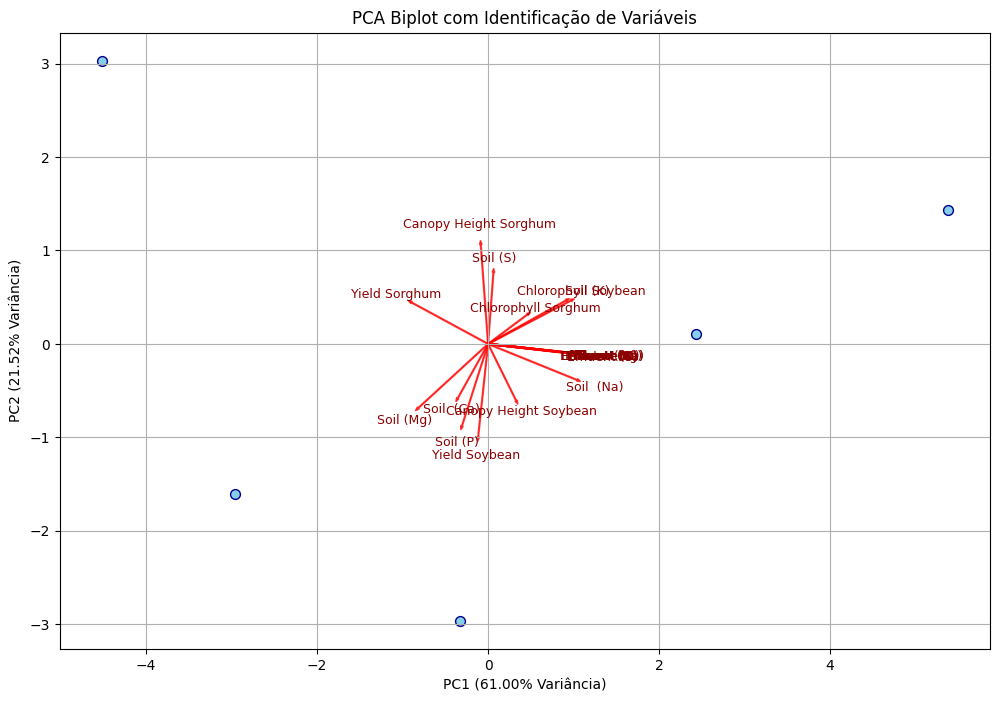

In [10]:
# Criando o biplot com identificação de variáveis
plt.figure(figsize=(12, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='skyblue', s=50, edgecolor='darkblue', marker='o')
plt.xlabel(f'PC1 ({explained_variance[0]:.2f}% Variância)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}% Variância)')
plt.title('PCA Biplot com Identificação de Variáveis')

# Adicionando setas e etiquetas para as variáveis originais
for i, (x, y) in enumerate(pca.components_.T * np.sqrt(pca.explained_variance_)):
    plt.arrow(0, 0, x, y, color='red', alpha=0.7, width=0.01)
    plt.text(x * 1.2, y * 1.2, numeric_data.columns[i], color='darkred', ha='center', va='center', fontsize=9)

plt.grid(True)
plt.show()

In [11]:
# Cálculo das cargas dos componentes principais para cada variável
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=numeric_data.columns)
loadings

,PC1,PC2
Treatments,0.28,-0.05
Canopy Height Soybean,0.08,-0.25
Chlorophyll Soybean,0.23,0.20
Yield Soybean,-0.03,-0.42
Canopy Height Sorghum,-0.02,0.45
Chlorophyll Sorghum,0.11,0.13
Yield Sorghum,-0.22,0.19
Soil (P),-0.08,-0.37
Soil (K),0.24,0.20
Soil (Ca),-0.09,-0.24
